# Instalação de recursos necessários

Para a análise do projeto é necessário que se instale as seguintes bibliotecas:

* pandas
* matplotlib
* opnpyxl
* seaborn

In [ ]:
#importar bibliotecas

!pip install pandas
!pip install matplotlib
!pip install opnpyxl
!pip install seaborn

# Preparação do data set

* Para a preparação do dataset, foi necessário realizar o download dos arquivos disponíveis na seção de dados abertos do site Gov.br.
* Para a análise do projeto, recomenda-se o download de dados de pelo menos dois meses, para essa análise foram utilizados onze meses.
* Os arquivos devem ser processados no Jupyter utilizando Python. 
* Durante a mesclagem dos datasets, foi essencial configurar corretamente o delimitador dos arquivos CSV, que neste caso é o ponto e vírgula (;), e definir o encoding como 1252 para tratar adequadamente os caracteres especiais e evitar problemas de formatação.

In [ ]:
#importar os dados da planilha csv

import pandas as pd

tabela_01 = pd.read_csv("EDA_Manipulados_202101.csv", delimiter=";", encoding="1252")
tabela_02 = pd.read_csv("EDA_Manipulados_202102.csv", delimiter=";", encoding="1252")
tabela_03 = pd.read_csv("EDA_Manipulados_202103.csv", delimiter=";", encoding="1252")
tabela_04 = pd.read_csv("EDA_Manipulados_202104.csv", delimiter=";", encoding="1252")
tabela_05 = pd.read_csv("EDA_Manipulados_202105.csv", delimiter=";", encoding="1252")
tabela_06 = pd.read_csv("EDA_Manipulados_202106.csv", delimiter=";", encoding="1252")
tabela_07 = pd.read_csv("EDA_Manipulados_202107.csv", delimiter=";", encoding="1252")
tabela_08 = pd.read_csv("EDA_Manipulados_202108.csv", delimiter=";", encoding="1252")
tabela_09 = pd.read_csv("EDA_Manipulados_202109.csv", delimiter=";", encoding="1252")
tabela_10 = pd.read_csv("EDA_Manipulados_202110.csv", delimiter=";", encoding="1252")
tabela_11 = pd.read_csv("EDA_Manipulados_202111.csv", delimiter=";", encoding="1252")

tabela = pd.concat([tabela_01, tabela_02, tabela_03, tabela_04, tabela_05, tabela_06, tabela_07, tabela_08, tabela_09, tabela_10, tabela_11])

In [20]:
display(tabela)
display(f"Colunas: {tabela.columns.to_list()}")
display(f"Quantidade de registros: {tabela.size}")

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,DCB,PRINCIPIO_ATIVO,QTD_ATIVO_POR_UNID_FARMACOTEC,UNIDADE_MEDIDA_PRINCIPIO_ATIVO,QTD_UNIDADE_FARMACOTECNICA,TIPO_UNIDADE_FARMACOTECNICA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2021,1,AC,CRUZEIRO DO SUL,712,CLORIDRATO DE AMITRIPTILINA,"0,075",GRAMA,480,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
1,2021,1,AC,CRUZEIRO DO SUL,712,CLORIDRATO DE AMITRIPTILINA,"0,0125",GRAMA,240,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
2,2021,1,AC,CRUZEIRO DO SUL,712,CLORIDRATO DE AMITRIPTILINA,"0,025",GRAMA,240,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
3,2021,1,AC,CRUZEIRO DO SUL,2489,DIFOSFATO DE CLOROQUINA,"0,2",GRAMA,1680,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
4,2021,1,AC,CRUZEIRO DO SUL,3513,OXALATO DE ESCITALOPRAM,"0,01",GRAMA,480,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246904,2021,11,TO,PORTO NACIONAL,9113,CLORIDRATO DE VENLAFAXINA,"0,05",GRAMA,1080,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN
246905,2021,11,TO,PORTO NACIONAL,9296,HEMITARTARATO DE ZOLPIDEM,"0,005",GRAMA,3510,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN
246906,2021,11,TO,PORTO NACIONAL,9296,HEMITARTARATO DE ZOLPIDEM,"0,01",GRAMA,2430,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN
246907,2021,11,TO,PORTO NACIONAL,9296,HEMITARTARATO DE ZOLPIDEM,"0,008",GRAMA,540,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN


"Colunas: ['ANO_VENDA', 'MES_VENDA', 'UF_VENDA', 'MUNICIPIO_VENDA', 'DCB', 'PRINCIPIO_ATIVO', 'QTD_ATIVO_POR_UNID_FARMACOTEC', 'UNIDADE_MEDIDA_PRINCIPIO_ATIVO', 'QTD_UNIDADE_FARMACOTECNICA', 'TIPO_UNIDADE_FARMACOTECNICA', 'CONSELHO_PRESCRITOR', 'UF_CONSELHO_PRESCRITOR', 'TIPO_RECEITUARIO', 'CID10', 'SEXO', 'IDADE', 'UNIDADE_IDADE']"

'Quantidade de registros: 67759875'

# Questão 1 - Quais são as características principais do dataset?
* O dataset contém informações detalhadas sobre a venda de medicamentos manipulados sujeitos à escrituração no SNGPC (Sistema Nacional de Gerenciamento de Produtos Controlados), provenientes de farmácias e drogarias privadas. 
* Contém registros das movimentações de medicamentos controlados, com dados organizados mensalmente. 
* Os dados abrangem informações como:
    - ano; 
    - mês; 
    - localização (UF e município) da venda;
    - princípio ativo;
    - quantidade e tipo de unidade farmacotécnica; 
    - e detalhes sobre a prescrição, como o conselho de classe e o tipo de receituário utilizado. 

* Para medicamentos antimicrobianos, há campos adicionais, como:
    - CID10; 
    - sexo;
    - idade; 
    - e unidade de medida da idade. 

# Questão 2 - Quais padrões ou tendências podem ser observados nos dados?



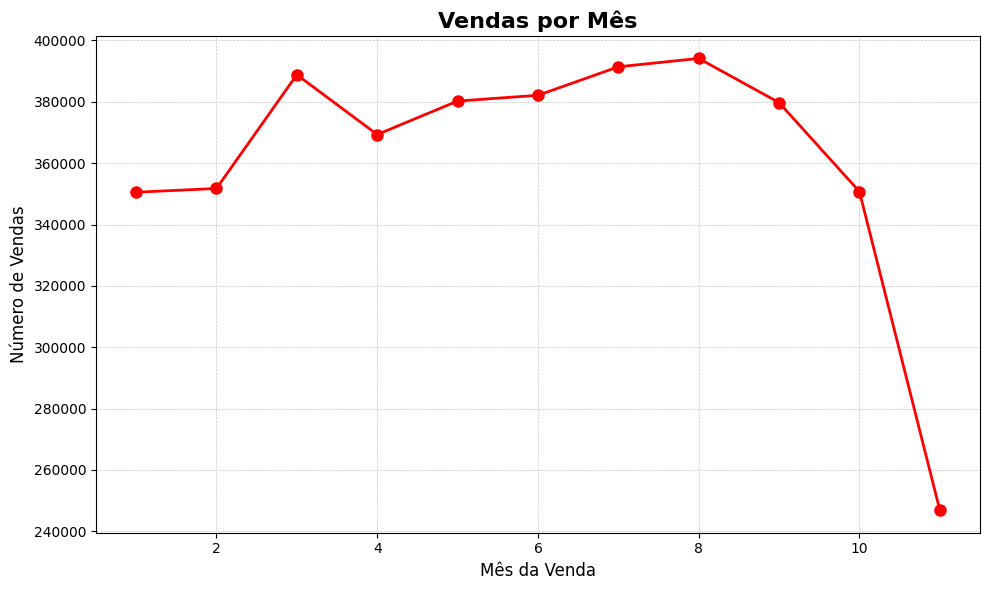

In [ ]:
#Criando gráfico de linha de tendência

import matplotlib.pyplot as plt

vendas_por_mes = tabela.groupby(['MES_VENDA']) # Agrupa por mês
vendas_por_mes = vendas_por_mes.size() # Faz contagem de vendas

plt.figure(figsize=(10, 6)) 
plt.plot(
    vendas_por_mes.index,
    vendas_por_mes.values, 
    marker='o', 
    color='red', 
    linestyle='-', 
    linewidth=2, 
    markersize=8
)

plt.title('Vendas por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês da Venda', fontsize=12) 
plt.ylabel('Número de Vendas', fontsize=12)  

# Configura a grid no fundo do gráfico
plt.grid(
    visible=True, 
    which='both', 
    linestyle='--', 
    linewidth=0.5, 
    alpha=0.7
)  

plt.tight_layout() # Ajusta automáticamente tamanhos e disposições no gráfico
plt.show()



- Pico em Março (Potencialmente reflexo do pós Carnaval)
- Tendência de aumento ocorre de Maio até Agosto (Possivelmente relacionada a mudança do clima e a estação de Inverno)
- Queda brusca nos dois últimos meses (Provavelmente motivada pela determinação de que "a transmissão de arquivos com dados de movimentações de medicamentos e insumos sujeitos ao controle especial ficou opcional, entre 05/10/2021 e 22/12/2022, e passou a ser suspensa, a partir de 23/12/2022.", descrita na página do dataset)

# Questão 3 - Como os dados foram preparados para análise?

* Para a preparação da análise foi feito um agrupamento de dados no ano de 2021 por mês, através do groupby na coluna 'MES_VENDA';
* Em seguida, utilizado o método size para realizar a contagem de cada ocorrencia por mês;
* Retornando os dados do agrupamento é realizado a preparação do gráfico para demonstrar a tendência de venda de medicamentos durante o período de 11 meses.



# Questão 4 - Quais os medicamentos mais vendidos no país durante o inverno?

,PRINCIPIO_ATIVO,QUANTIDADE
534,TESTOSTERONA,77186
323,GABAPENTINA,68463
156,CLORIDRATO DE AMITRIPTILINA,51759
159,CLORIDRATO DE BUPROPIONA,51655
545,TOPIRAMATO,48096
185,CLORIDRATO DE FLUOXETINA,46592
465,PREGABALINA,45683
297,ESTOLATO DE ERITROMICINA,42690
221,CLORIDRATO DE TRAMADOL,42419
438,OXANDROLONA,40468


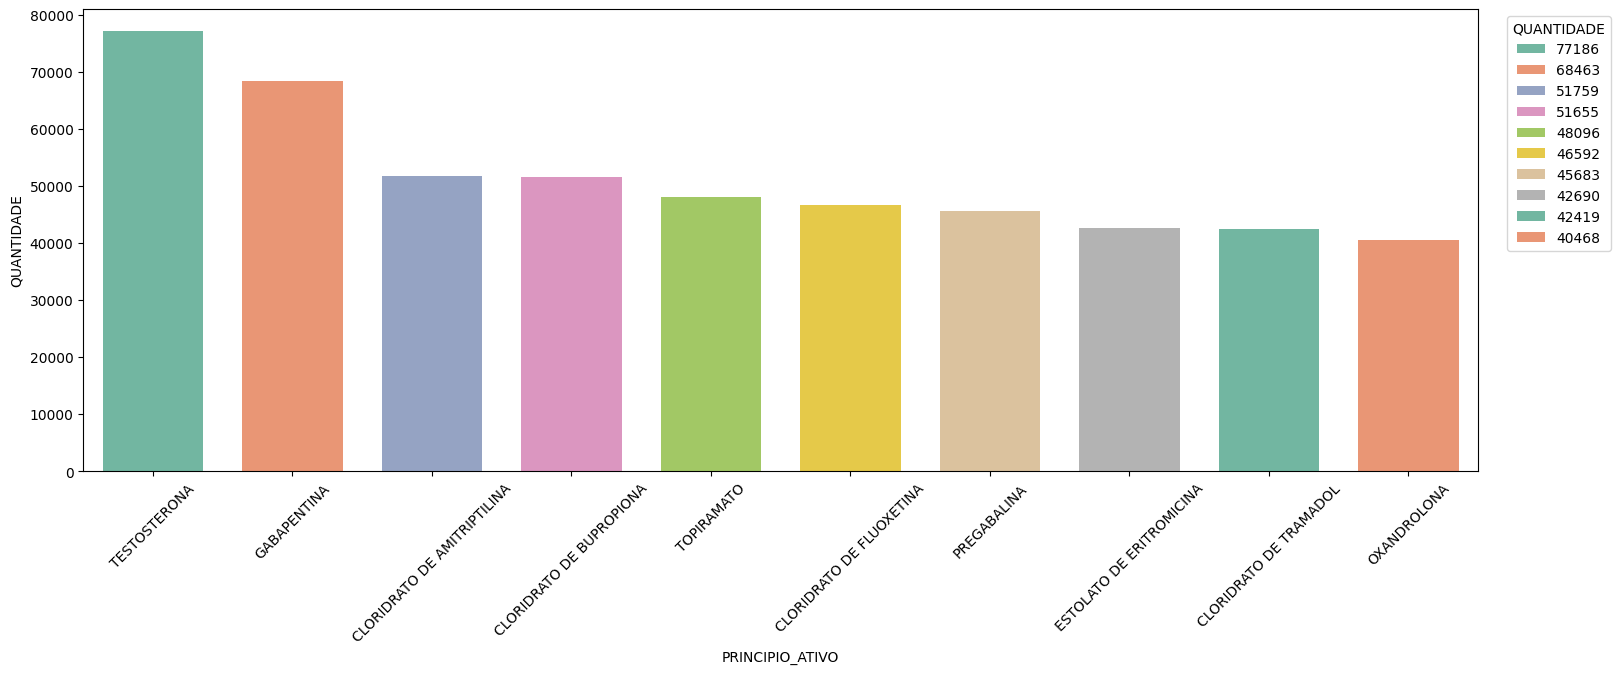

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

vendas_medicamento_inverno = tabela.query('MES_VENDA >= 6 and MES_VENDA <= 9') # Filtra os registros do mês 6 ao 9 (inverno)

venda_medicamentos = vendas_medicamento_inverno.groupby('PRINCIPIO_ATIVO') # Agrupa por medicamento
venda_medicamentos = venda_medicamentos.size().reset_index(name='QUANTIDADE') # Faz contagem de vendas e nomeia coluna para 'QUANTIDADE'
venda_medicamentos = venda_medicamentos.sort_values(by='QUANTIDADE', ascending=False) # Coloca em ordem decrescente de acordo com a 'QUANTIDADE'

plt.figure(figsize=(18, 6))

bp = sns.barplot(
    data=venda_medicamentos.head(10), 
    x='PRINCIPIO_ATIVO', 
    y='QUANTIDADE', 
    palette='Set2', 
    hue='QUANTIDADE', 
    hue_order=venda_medicamentos.head(10)['QUANTIDADE'], 
    errorbar=None, 
    gap=0.1
)

sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1)) # Move legenda para fora do gráfico (canto direito)
bp.tick_params(axis='x', labelrotation=45) # Rotaciona as legendas do eixo x

display(venda_medicamentos.head(10))

Agrupando por categorias temos:  

1. Neurológicos e dores  
**Gabapentina, Pregabalina, Topiramato**: Neuropatias, epilepsia, enxaquecas.  

2. Psiquiátricos  
**Cloridrato de Amitriptilina, Cloridrato de Bupropiona, Cloridrato de Fluoxetina**: Depressão, ansiedade, transtornos associados.  

3. Hormonal e anabolizantes  
**Testosterona, Oxandrolona**: Reposição hormonal, ganho de massa corporal.  

4. Analgésico  
**Cloridrato de Tramadol**: Dor moderada a severa.  

5. Antibiótico  
**Estolato de Eritromicina**: Infecções bacterianas.  

# Questão 5 - Qual a quantidade vendida em cada estado durante o inverno?

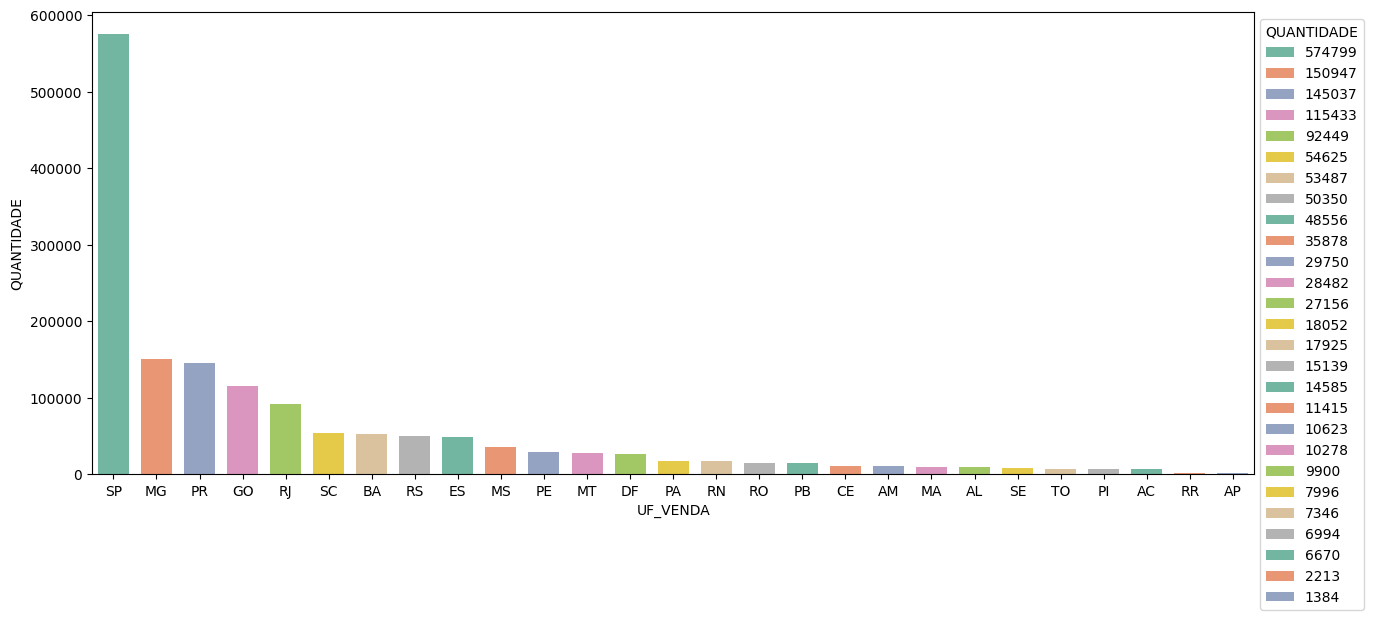

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

vendas_medicamento_inverno = tabela.query('MES_VENDA >= 6 and MES_VENDA <= 9') # Filtra os registros do mês 6 ao 9 (inverno)

vendas_uf = vendas_medicamento_inverno.groupby('UF_VENDA') # Agrupa por estado
vendas_uf = vendas_uf.size().reset_index(name='QUANTIDADE') # Faz contagem de vendas e nomeia coluna para 'QUANTIDADE'
vendas_uf = vendas_uf.sort_values(by='QUANTIDADE', ascending=False) # Coloca em ordem decrescente de acordo com a 'QUANTIDADE'

plt.figure(figsize=(15, 6))

bp = sns.barplot(
    data=vendas_uf, 
    x='UF_VENDA', 
    y='QUANTIDADE', 
    palette='Set2', 
    hue='QUANTIDADE', 
    hue_order=vendas_uf['QUANTIDADE'], 
    errorbar=None, 
    gap=0.1
)

sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1)) # Move legenda para fora do gráfico (canto direito)

- Diferença enorme entre o 1º da lista e os demais (Quase 4x mais que o 2º lugar)

# Questão 6 - Quais os medicamentos mais vendidos em cada estado durante o inverno?


,PRINCIPIO_ATIVO,QUANTIDADE
6,TESTOSTERONA,15
2,GABAPENTINA,4
1,ESTOLATO DE ERITROMICINA,4
0,CLORIDRATO DE AMITRIPTILINA,1
3,METRONIDAZOL,1
4,OXALATO DE ESCITALOPRAM,1
5,PREGABALINA,1


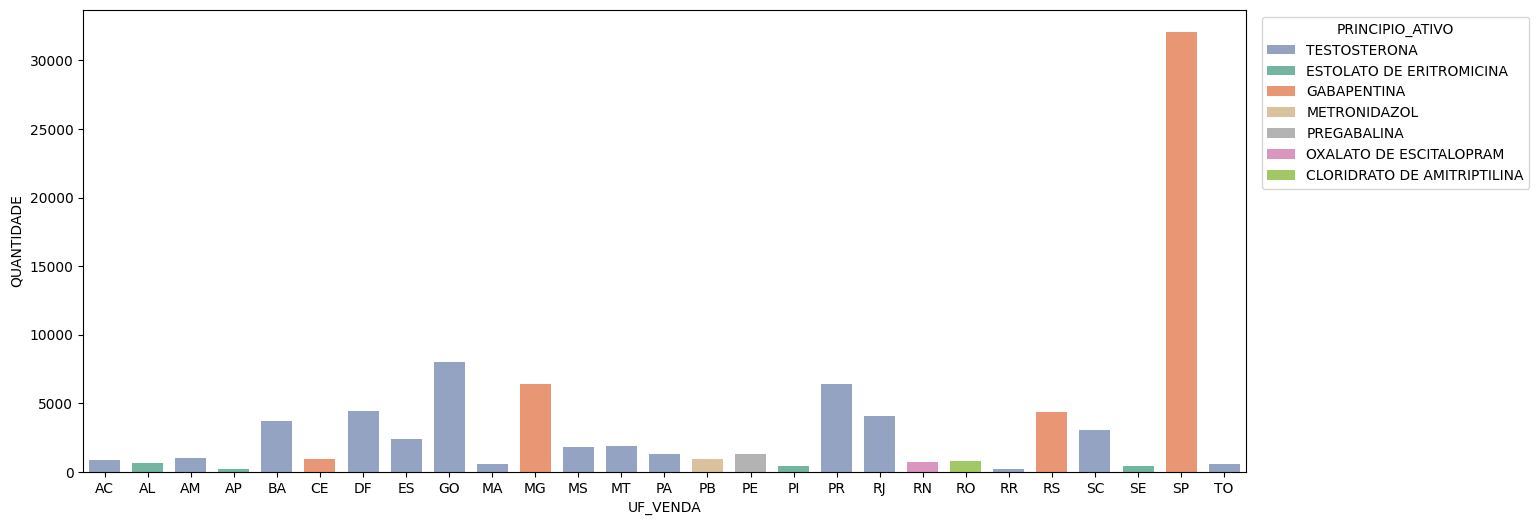

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

vendas_medicamento_inverno = tabela.query('MES_VENDA >= 6 and MES_VENDA <= 9') # Filtra os registros do mês 6 ao 9 (inverno)

medicamento_uf = vendas_medicamento_inverno.groupby(['UF_VENDA', 'PRINCIPIO_ATIVO']) # Agrupa por estado e medicamento
medicamento_uf = medicamento_uf.size().reset_index(name='QUANTIDADE') # Faz contagem de vendas e nomeia coluna para 'QUANTIDADE'
medicamento_uf = medicamento_uf.sort_values(by='QUANTIDADE', ascending=False) # Coloca em ordem decrescente de acordo com a 'QUANTIDADE'

idx_mais_vendidos = medicamento_uf.groupby('UF_VENDA')['QUANTIDADE'].idxmax() # Obtém índices dos medicamentos mais vendidos por estado
medicamento_mais_vendidos_uf = medicamento_uf.loc[idx_mais_vendidos] # Filtra os registros com base nos índices dos mais vendidos

# Exibe uma tabela com os mais vendidos
display(medicamento_mais_vendidos_uf.groupby('PRINCIPIO_ATIVO').size().reset_index(name='QUANTIDADE').sort_values('QUANTIDADE', ascending=False))

plt.figure(figsize=(15, 6))

bp = sns.barplot(
    data=medicamento_mais_vendidos_uf, 
    x='UF_VENDA', 
    y='QUANTIDADE', 
    palette='Set2', 
    hue='PRINCIPIO_ATIVO', 
    hue_order=medicamento_mais_vendidos_uf['PRINCIPIO_ATIVO'], 
    errorbar=None, 
    gap=0.1
)

sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.25, 1)) # Move legenda para fora do gráfico (canto direito)

- Apesar do medicamento mais vendido ser a testosterona, ele não é o mais vendido no estado que mais vende

# Questão 7 - Quais os 5 maiores municipios de São Paulo com vendas de medicamentos durante o inverno?



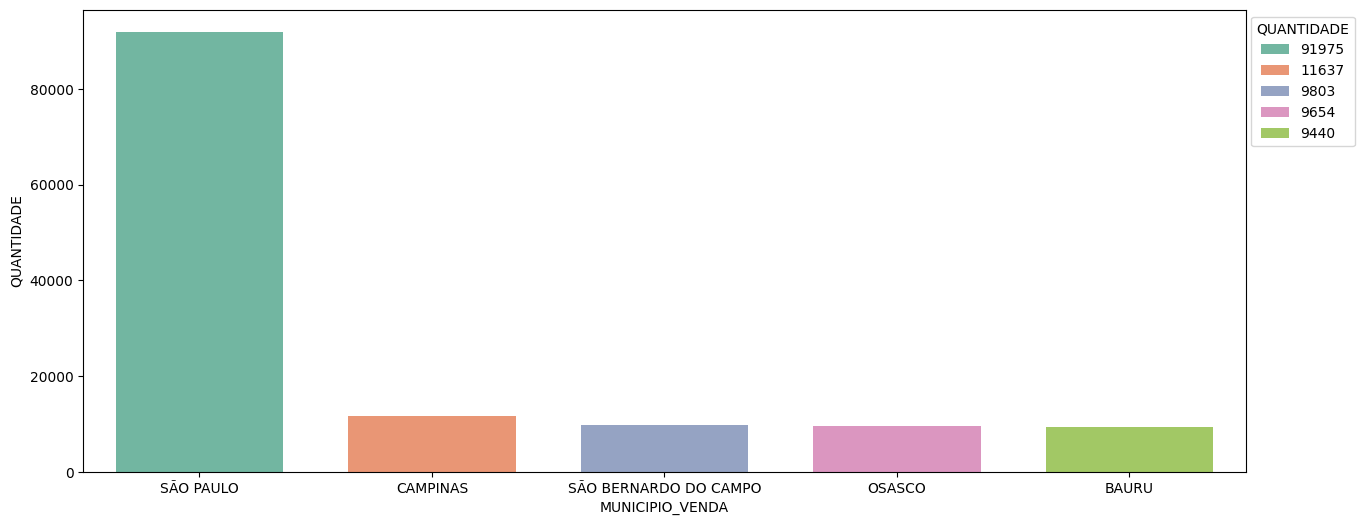

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

vendas_medicamento_inverno = tabela.query('MES_VENDA >= 6 and MES_VENDA <= 9') # Filtra os registros do mês 6 ao 9 (inverno)

vendas_municipio_sp = vendas_medicamento_inverno.query('UF_VENDA == "SP"') # Filtra os registros do estado de São Paulo
vendas_municipio_sp = vendas_municipio_sp.groupby('MUNICIPIO_VENDA') # Agrupa por municipio
vendas_municipio_sp = vendas_municipio_sp.size().reset_index(name='QUANTIDADE') # Faz contagem de vendas e nomeia coluna para 'QUANTIDADE'
vendas_municipio_sp = vendas_municipio_sp.sort_values(by='QUANTIDADE', ascending=False) # Coloca em ordem decrescente de acordo com a 'QUANTIDADE'
vendas_municipio_sp = vendas_municipio_sp.head() # Obtém somente os 5 primeiros registros

plt.figure(figsize=(15, 6))

bp = sns.barplot(
    data=vendas_municipio_sp, 
    x='MUNICIPIO_VENDA', 
    y='QUANTIDADE', 
    palette='Set2', 
    hue='QUANTIDADE', 
    hue_order=vendas_municipio_sp['QUANTIDADE'], 
    errorbar=None, 
    gap=0.1
)

sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1)) # Move legenda para fora do gráfico (canto direito)

- Diferença enorme entre o 1º da lista e os demais (Quase 8x mais que o 2º lugar)

# Questão 8 - Quais os medicamentos mais vendidos em cada município de SP durante o inverno?


,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QUANTIDADE
16804,SÃO PAULO,ESTOLATO DE ERITROMICINA,7033
15939,SÃO CAETANO DO SUL,GABAPENTINA,1179
7604,ITU,TESTOSTERONA,1073
13680,RIBEIRÃO PRETO,GABAPENTINA,939
14844,SANTO ANDRÉ,GABAPENTINA,902
15802,SÃO BERNARDO DO CAMPO,GABAPENTINA,880
3332,CAMPINAS,TESTOSTERONA,828
10789,OSASCO,ESTOLATO DE ERITROMICINA,807
16480,SÃO JOSÉ DOS CAMPOS,TESTOSTERONA,694
687,ARARAQUARA,GABAPENTINA,647


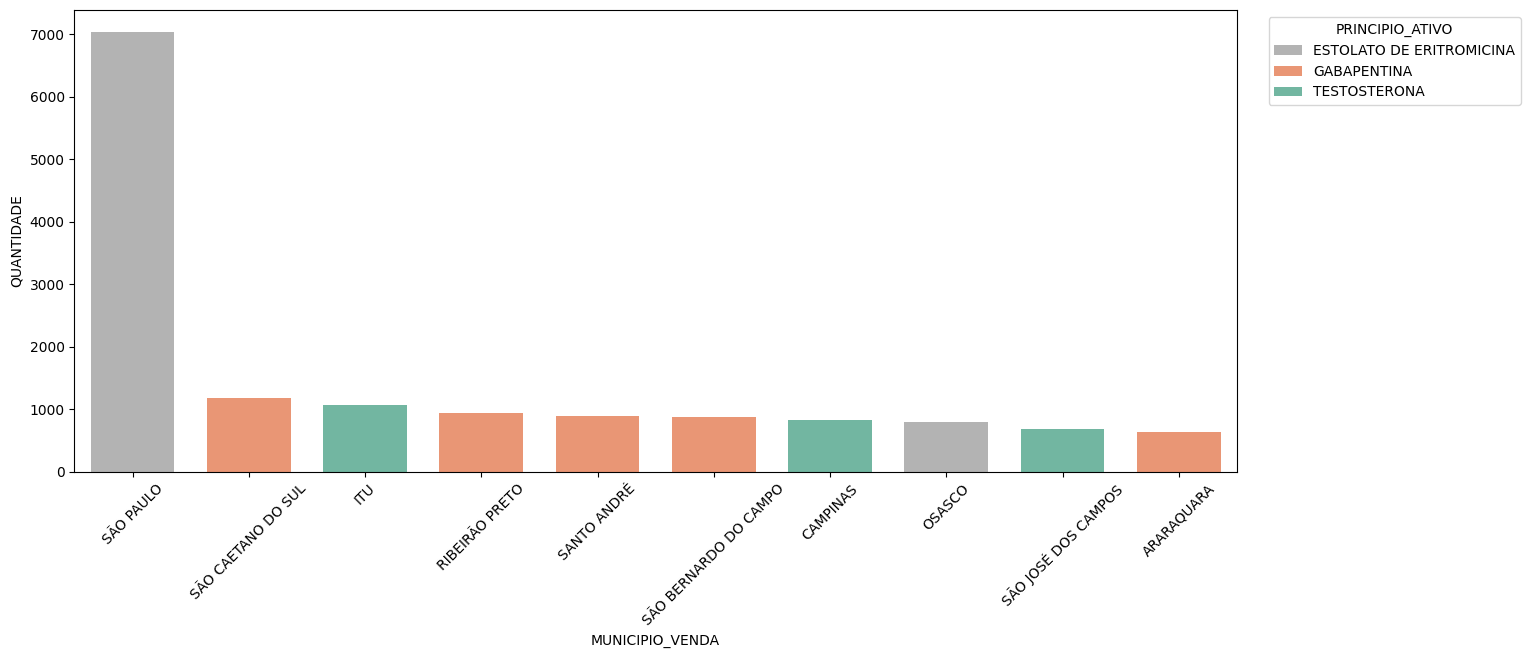

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

vendas_medicamento_inverno = tabela.query('MES_VENDA >= 6 and MES_VENDA <= 9') # Filtra os registros do mês 6 ao 9 (inverno)

medicamento_municipio_sp = vendas_medicamento_inverno.query('UF_VENDA == "SP"') # Filtra os registros do estado de São Paulo
medicamento_municipio_sp = medicamento_municipio_sp.groupby(['MUNICIPIO_VENDA', 'PRINCIPIO_ATIVO']) # Agrupa por município e medicamento
medicamento_municipio_sp = medicamento_municipio_sp.size().reset_index(name='QUANTIDADE') # Faz contagem de vendas e nomeia coluna para 'QUANTIDADE'
medicamento_municipio_sp = medicamento_municipio_sp.sort_values(by='QUANTIDADE', ascending=False) # Coloca em ordem decrescente de acordo com a 'QUANTIDADE'

idx_mais_vendidos_municipio_sp = medicamento_municipio_sp.groupby('MUNICIPIO_VENDA')['QUANTIDADE'].idxmax() # Obtém índices dos medicamentos mais vendidos por estado
medicamento_mais_vendidos_municipio_sp = medicamento_municipio_sp.loc[idx_mais_vendidos_municipio_sp] # Filtra os registros com base nos índices dos mais vendidos
medicamento_mais_vendidos_municipio_sp = medicamento_mais_vendidos_municipio_sp.sort_values(by='QUANTIDADE', ascending=False) # Coloca em ordem decrescente de acordo com a 'QUANTIDADE'
medicamento_mais_vendidos_municipio_sp = medicamento_mais_vendidos_municipio_sp.head(10) # Obtém somente os 10 primeiros registros

display(medicamento_mais_vendidos_municipio_sp) # Exibe uma tabela com os 10 mais vendidos

plt.figure(figsize=(15, 6))

bp = sns.barplot(
    data=medicamento_mais_vendidos_municipio_sp, 
    x='MUNICIPIO_VENDA', 
    y='QUANTIDADE', 
    palette='Set2', 
    hue='PRINCIPIO_ATIVO', 
    hue_order=medicamento_mais_vendidos_municipio_sp['PRINCIPIO_ATIVO'], 
    errorbar=None, 
    gap=0.1
)

sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.25, 1)) # Move legenda para fora do gráfico (canto direito)
bp.tick_params(axis='x', labelrotation=45) # Rotaciona as legendas do eixo x

- Diferença enorme entre o 1º da lista e os demais (Quase 6x mais que o 2º lugar)
- Mudança no ranking de medicamentos, por Município:
    - Estolato de Eritromicina ultrapassa a Gapapentina (Mais vendida do Estado de São Paulo)
    - Estolato de Eritromicina ultrapassa a Testosterona (Mais vendida do País)

# Questão 9 - Que insights podem ser extraídos a partir de visualizações gráficas?

As visualizações gráficas permitem identificar tendências e padrões importantes que poderiam passar despercebidos na análise tabular dos dados. Entre os insights extraídos a partir dos gráficos gerados:
1.	Tendência de vendas por mês: Identificou-se que o pico de vendas ocorreu nos meses de inverno, com um aumento significativo a partir de junho até agosto. Isso sugere que há uma relação entre o volume de vendas de medicamentos controlados e as condições sazonais.

1.	Distribuição geográfica de vendas: Estados como São Paulo, Minas Gerais e Paraná se destacaram no volume de vendas. Isso pode refletir a densidade populacional ou políticas de saúde locais que incentivem a utilização de medicamentos controlados.

2.	Medicamentos mais vendidos por estado: Apesar de a testosterona ser o medicamento mais vendido no país, há variações regionais, como o predomínio do Estolato de Eritromicina em São Paulo. Isso sugere diferenças nas demandas de saúde de acordo com as características demográficas ou epidemiológicas.

3.	Foco em municípios de destaque: Nos municípios líderes de vendas, como São Paulo e Campinas, observa-se que a predominância de certos medicamentos pode estar ligada à concentração de centros médicos especializados ou de grandes redes de farmácias.

4.	Relação entre doenças sazonais e medicamentos mais vendidos: O aumento das vendas de medicamentos como antibióticos e antidepressivos pode indicar um reflexo de sazonalidades, como aumento de infecções respiratórias ou maior prevalência de transtornos emocionais durante o inverno.




# Questão 10 - Quais são as conclusões macros dos dados analisados?


1.	Influência sazonal nas vendas: As vendas de medicamentos controlados aumentam significativamente no inverno, destacando-se a necessidade de planejamento estratégico por parte das farmácias para atender à demanda sazonal.

2.	Diferenças regionais no consumo de medicamentos: Estados e municípios apresentam perfis diferentes de consumo, com São Paulo liderando o volume de vendas, enquanto medicamentos mais específicos, como o Estolato de Eritromicina, dominam localmente. Isso pode estar relacionado a fatores socioeconômicos, culturais e de saúde pública.

3.	Medicamentos populares e sua relevância clínica: A testosterona é o medicamento mais vendido no país, o que pode estar associado à sua prescrição ampla para reposição hormonal. Outros medicamentos como antibióticos (Estolato de Eritromicina) e antidepressivos (Cloridrato de Amitriptilina) refletem as principais demandas de saúde da população.

4.	Importância da análise de dados para tomadas de decisão: Os insights gerados pela análise gráfica e tabular podem ajudar farmácias, indústrias farmacêuticas e gestores de saúde a ajustar estoques, criar campanhas de conscientização e melhorar políticas públicas.

5.	Dados como suporte para estratégias de mercado: A identificação de padrões de consumo em diferentes estados e municípios pode orientar estratégias de marketing regionalizadas, otimizando investimentos e ampliando o alcance de medicamentos em áreas de maior demanda.
